# Dependencies

In [32]:
import pandas as pd
import numpy as np

# Preprocess

In [33]:
#%run preprocess.ipynb

df = pd.read_csv("data.csv")

# Explore the data

In [34]:
df

,Unnamed: 0,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,primarily_steam_deck
0,2,168118609,"{'steamid': '76561199132338764', 'num_games_ow...",english,> `\n> invincible\n> instant_build\n> max_reso...,1719260702,1736147489,True,0,0,0.000000,0,False,False,False,False
1,7,114632482,"{'steamid': '76561199174950310', 'num_games_ow...",english,this game is is NOT mod friendly the mods on t...,1651178922,1736131147,False,0,0,0.000000,0,True,False,False,False
2,23,121555469,"{'steamid': '76561198192200985', 'num_games_ow...",english,dlc simulator,1662004965,1736103375,False,0,0,0.000000,0,True,False,False,False
3,32,137969968,"{'steamid': '76561198273000119', 'num_games_ow...",english,"Giving me issues with windows 11, had to run i...",1683494915,1736088407,True,0,0,0.469196,1,True,False,False,False
4,34,41569120,"{'steamid': '76561198119533271', 'num_games_ow...",english,sucks ass,1524135627,1736077360,True,1,0,0.499312,0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94042,94941,22881655,"{'steamid': '76561198008837363', 'num_games_ow...",english,The menu looks nice,1462810353,1462810353,True,16,16,0.388136,1,True,False,False,False
94043,94942,22881630,"{'steamid': '76561198090386692', 'num_games_ow...",english,Game of thrones in space!!!,1462810229,1462810229,True,5,3,0.295665,0,True,False,False,False
94044,94943,22881480,"{'steamid': '76561198005610307', 'num_games_ow...",english,https://www.youtube.com/watch?v=hvmcvfzHEjY\n\...,1462809610,1462809943,True,482,25,0.718119,30,False,True,False,False
94045,94944,22881467,"{'steamid': '76561198005120097', 'num_games_ow...",english,[h1]FULL VIDEO REVIEW:[/h1] https://youtu.be/i...,1462809557,1462809605,True,184,9,0.652378,15,False,True,False,False


In [35]:
#df[df["votes_funny"] > 0]["votes_funny"]

np.unique(df["votes_funny"], return_counts=True)[0]


#list(df["votes_funny"]).index(max(df["votes_funny"]))

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   77,   78,   80,   81,
         82,   83,   85,   86,   87,   89,   91,   92,   93,   95,   96,
         97,   98,   99,  100,  101,  103,  104,  105,  106,  107,  109,
        110,  111,  112,  113,  114,  116,  118,  121,  122,  126,  127,
        130,  132,  136,  137,  139,  142,  143,  150,  151,  161,  162,
        166,  168,  169,  170,  173,  174,  178,  179,  180,  187,  189,
        191,  192,  194,  196,  199,  209,  216,  221,  224,  229,  230,
        231,  238,  241,  247,  248,  272,  287,  2

In [38]:
df[df["votes_up"] == 0]["review"]

0        > `\n> invincible\n> instant_build\n> max_reso...
1        this game is is NOT mod friendly the mods on t...
2                                            dlc simulator
3        Giving me issues with windows 11, had to run i...
5        its fun but the dlcs are a bit expensive but e...
                               ...                        
94007    space pirates why do you have to be so op........
94009    >Attacked by Space pirate\n>ahh should be easy...
94012                           First impression is great!
94019    It is all you could want from a space game. Sc...
94026    Fantastic game. Very high ammounts of customiz...
Name: review, Length: 63197, dtype: object

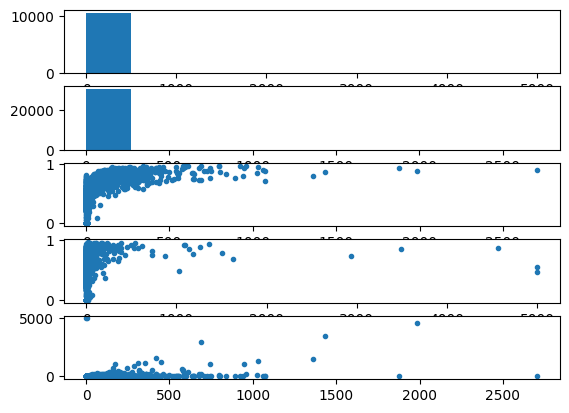

In [39]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(nrows=5)
axs[0].hist(df[df["votes_funny"] > 0]["votes_funny"])
axs[1].hist(df[df["votes_up"] > 0]["votes_up"])
axs[2].plot(df["votes_up"], df["weighted_vote_score"], ".")
axs[3].plot(df["votes_funny"], df["weighted_vote_score"], ".")
axs[4].plot(df["votes_up"], df["votes_funny"], ".")

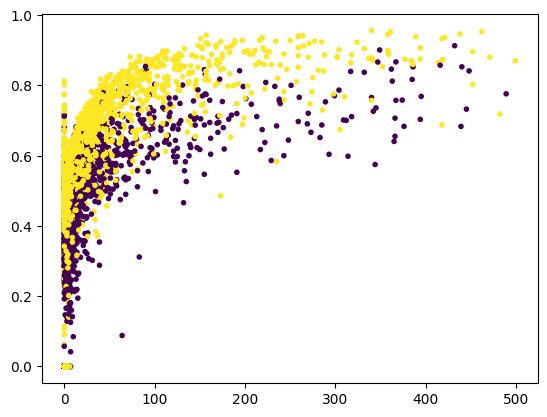

In [40]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(nrows=1)
axs.scatter(df[df["votes_up"] < 500]["votes_up"], df[df["votes_up"] < 500]["weighted_vote_score"], marker=".", c=df[df["votes_up"] < 500]["voted_up"])

This plot (scatter of weighted score vs upvotes) is interesting, because it tells us that there is some explanatory power in the recommendation (yes or no).

In [41]:
np.unique(df["weighted_vote_score"], return_counts=True)

(array([0.        , 0.04173409, 0.05753214, ..., 0.96312642, 0.9631837 ,
        0.97223175], shape=(15016,)),
 array([58795,     1,     1, ...,     1,     1,     1], shape=(15016,)))

In [42]:
df["timestamp_created"]

0        1719260702
1        1651178922
2        1662004965
3        1683494915
4        1524135627
            ...    
94042    1462810353
94043    1462810229
94044    1462809610
94045    1462809557
94046    1462809600
Name: timestamp_created, Length: 94047, dtype: int64